In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
X = df['comment_text']
y = df['toxic']

In [5]:
text_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [6]:
text_clf.predict(['you suck and I fucking hate you'])

array([1])

In [7]:
text_clf.predict_proba(['you suck and I fucking hate you'])

array([[0.03838288, 0.96161712]])

In [8]:
text_clf.predict_proba(['that was great, thank you!'])

array([[0.99748885, 0.00251115]])

In [9]:
text_clf.predict(['that was great, thank you!'])

array([0])

Test on sample twitter dataset

In [10]:
twitter_df = pd.read_csv('data/sample_with_label.csv')
twitter_df.columns = ['Index','TweetID','ScreenName','TweetText','TweetDateTime','Followers','UserID','WasDeleted']
twitter_df.head()


,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0


In [11]:
twitter_df['ToxicityProba'] = text_clf.predict_proba(twitter_df['TweetText'])[:,1]

In [12]:
twitter_df

,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0,0.095844
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0,0.175892
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0,0.001030
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0,0.003514
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0,0.004717
...,...,...,...,...,...,...,...,...,...
29444,29444,1244740153874223109,rSakirs,b'@Mertipekcix Ve bu ki\xc5\x9filerin \xc3\xa7...,2020-03-30 21:35:53,690,1238135533202702336,1,0.344168
29445,29445,1244740154981580800,lostboyale,b'Only the girls with onlyfans making bread rn...,2020-03-30 21:35:53,209,713132404454633472,0,0.017807
29446,29446,1244740160522076160,queensierra_rox,b'@ForlornJunkHeap @brujahistorica Serena shov...,2020-03-30 21:35:55,130,2828784699,0,0.036084
29447,29447,1244740161197543430,vrepitsash,b'@5SOS #ASK5SOS #5SOSCALM whos your favorite ...,2020-03-30 21:35:55,1794,2806244672,0,0.029545


In [13]:
twitter_df = twitter_df.sort_values(by=['ToxicityProba'],ascending=False)
twitter_df.head(10)


,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba
7443,7443,1244726683850211330,USAUncleBob,b'Fuck the Fucking Fucker!',2020-03-30 20:42:21,87,1046826822506352640,0,0.997731
27778,27778,1244739124877115393,yaoibkg,b'FUCK SHIT BITCH !',2020-03-30 21:31:48,270,1209234454226427905,0,0.995917
17205,17205,1244732947699294208,fanaticalgreed,b'\xe3\x85\xa4\xe2\xa0\x80\xe2\x9d\x9b Fuck Fu...,2020-03-30 21:07:15,66,3084573958,0,0.995611
23386,23386,1244736489113751555,nak__77,b'@Anath0ng fuck charloss bitch ass',2020-03-30 21:21:19,52,2235653056,0,0.995366
27931,27931,1244739214094319620,DarkSaraf,b'Fav and i show u my cock!\n#sugarbaby #sugar...,2020-03-30 21:32:09,7,1242905708380794880,0,0.995309
2639,2639,1244723539732770822,SamWebster1962,b'@seanhannity SHUT THE FUCK UP YOU STUPID FAT...,2020-03-30 20:29:52,101,1199098260964724736,0,0.994155
4959,4959,1244725028568076289,ArtistBetty,b'@GraysinAurora Fuck you skank ass whore fuck...,2020-03-30 20:35:47,0,1244364905647661058,0,0.993466
2167,2167,1244723229643677696,xyzodd,b'@certifiedjkwife go suck a donkey cock fuck ...,2020-03-30 20:28:38,68,1228618707531747329,0,0.992687
18776,18776,1244733812422127617,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 21:10:41,159,1059172170201513984,1,0.992287
5621,5621,1244725479598370821,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 20:37:34,158,1059172170201513984,1,0.992287


In [14]:
def is_response_tweet(tweet):
    return '@' in tweet

In [15]:
twitter_df['IsResponseTweet'] = twitter_df['TweetText'].apply(is_response_tweet)

In [16]:
response_tweets_df = twitter_df[twitter_df['IsResponseTweet']]

In the top 50 predicted toxic response tweets, 10% of them were deleted.

In [17]:
response_tweets_df.head(50)['WasDeleted'].values.sum()/50

0.1

By contrast, in the bottom 50 predicted toxic response tweets, 2% of them were deleted.

In [18]:
response_tweets_df.tail(50)['WasDeleted'].values.sum()/50

0.02

There are a lot of tweets with pornographic content that are getting deleted...

In [21]:
twitter_df[twitter_df['WasDeleted']==1].head(5)

,Index,TweetID,ScreenName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,ToxicityProba,IsResponseTweet
18776,18776,1244733812422127617,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 21:10:41,159,1059172170201513984,1,0.992287,False
5621,5621,1244725479598370821,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 20:37:34,158,1059172170201513984,1,0.992287,False
15609,15609,1244732039766708229,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 21:03:38,158,1059172170201513984,1,0.992287,False
159,159,1244721468715532295,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 20:21:38,158,1059172170201513984,1,0.991120,False
9330,9330,1244727924684718080,aribigd,b'if you\xe2\x80\x99re bored and horny and wan...,2020-03-30 20:47:17,158,1059172170201513984,1,0.991120,False


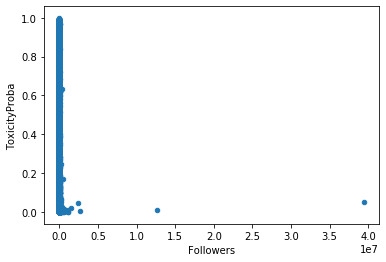

In [20]:
twitter_df.plot.scatter(x='Followers',y='ToxicityProba')